### Unir, fusionar y combinar conjuntos de datos con pandas

Sachin Pal

https://geekpython.medium.com/join-merge-and-combine-datasets-using-pandas-8bce3169ea1b

El procesamiento de datos se vuelve fundamental al entrenar un modelo de aprendizaje automático sólido. En ocasiones, necesitamos reestructurar y agregar nuevos datos a los conjuntos de datos para aumentar su eficiencia.

En este artículo, veremos cómo combinar y fusionar varios conjuntos de datos con los mismos nombres de columna y con nombres diferentes. Usaremos las `pandas` siguientes funciones de la biblioteca para realizar estas operaciones.

- `pandas.concat()`
- `pandas.merge()`
- `pandas.DataFrame.join()` 

#### Preparación de datos de muestra

Crearemos conjuntos de datos de muestra utilizando `pandas.DataFrame()` y luego realizaremos operaciones de concatenación en ellos.

In [6]:
import pandas as pd

In [7]:
data = {
    "Name": ["Sachin", "Siya", "Abhishek", "Rishu"],
    "Role": ["Python Developer", "Python Developer", "PHP Developer", "C++ Developer"],
    "Experience": [3, 3, 2, 4],
    "Qualification": ["Graduate", "Graduate", "Graduate", "Post-Graduate"]
}

data1 = {
    "Name": ["Yashwant", "Sanjana", "Yogesh", "Alisha"],
    "Role": ["Data Analyst", "ML Engineer", "Data Scientist", "Business Analyst"],
    "Experience": [2, 6, 4, 7],
    "Qualification": ["Post-Graduate", "Graduate", "Graduate", "Post-Graduate"],
    "Salary": [36000, 40000, 40000, 35000],
    "No_of_awards": [0, 1, 3 , 4]
}

df1 = pd.DataFrame(data)
df2 = pd.DataFrame(data1)

In [8]:
df1.to_csv('../data/employee.csv', index=False) # 'index=False' no incluirá el índice de columna como la '1st column'
df2.to_csv('../data/employee1.csv', index=False) # 'index=False' no incluirá el índice de columna como la '1st column'

__Data de muestra__

El código en la imagen generará dos conjuntos de datos a partir de `data` y `data1` utilizando `pd.DataFrame(data)` y `pd.DataFrame(data1)` y los almacenará en las variables `df1` y `df2`.

Luego, utilizando la `.to_csv()` función, `df1` y `df2` se guardarán en el CSVformato como `'employee.csv'` y `'employee1.csv'` respectivamente.

Aquí, los datos que creamos se ven como se muestra en la siguiente imagen.

In [9]:
dt = pd.read_csv('../data/employee.csv')
dt

,Name,Role,Experience,Qualification
0,Sachin,Python Developer,3,Graduate
1,Siya,Python Developer,3,Graduate
2,Abhishek,PHP Developer,2,Graduate
3,Rishu,C++ Developer,4,Post-Graduate


In [10]:
dt1 = pd.read_csv('../data/employee1.csv')
dt1

,Name,Role,Experience,Qualification,Salary,No_of_awards
0,Yashwant,Data Analyst,2,Post-Graduate,36000,0
1,Sanjana,ML Engineer,6,Graduate,40000,1
2,Yogesh,Data Scientist,4,Graduate,40000,3
3,Alisha,Business Analyst,7,Post-Graduate,35000,4


__Vista previa de datos__

#### Combinación de datos mediante concat()

Podemos utilizar la `pandas` biblioteca para analizar, modificar y hacer otras cosas con nuestros datos __CSV__ (valores separados por comas). La biblioteca incluye la `concat()` función que utilizaremos para realizar la concatenación de múltiples conjuntos de datos.

Hay dos ejes en los que se pueden concatenar los conjuntos de datos: el eje de filas y el eje de columnas.

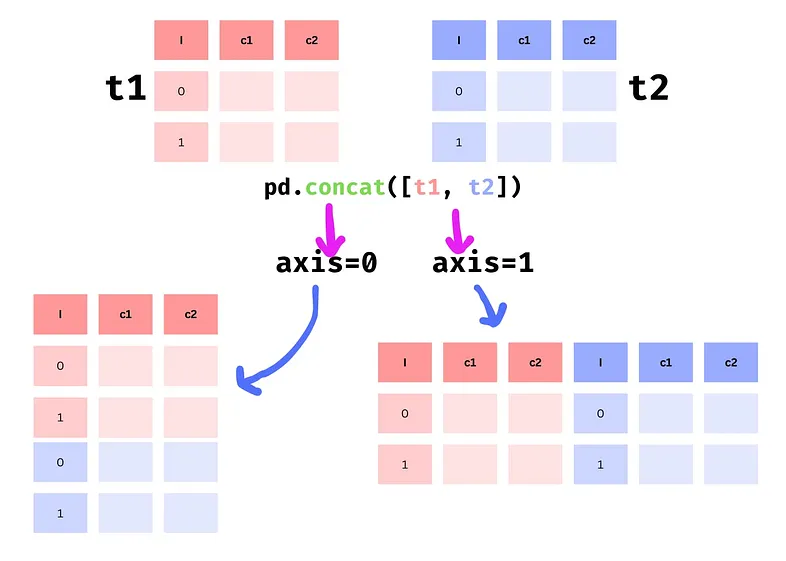

__Representación visual de la concatenación en los ejes__

#### Combinar datos a lo largo del eje de filas

Anteriormente creamos dos conjuntos de datos denominados `'employee.csv'` y `'employee1.csv'`. Los concatenaremos horizontalmente, lo que significa que los datos se empalmarán en las filas.

In [11]:
combinar = pd.concat([dt, dt1])
combinar

,Name,Role,Experience,Qualification,Salary,No_of_awards
0,Sachin,Python Developer,3,Graduate,NaN,NaN
1,Siya,Python Developer,3,Graduate,NaN,NaN
2,Abhishek,PHP Developer,2,Graduate,NaN,NaN
3,Rishu,C++ Developer,4,Post-Graduate,NaN,NaN
0,Yashwant,Data Analyst,2,Post-Graduate,36000.0,0.0
1,Sanjana,ML Engineer,6,Graduate,40000.0,1.0
2,Yogesh,Data Scientist,4,Graduate,40000.0,3.0
3,Alisha,Business Analyst,7,Post-Graduate,35000.0,4.0


__Datos concatenados__

La `concat()` función acepta algunos parámetros que afectan la concatenación de los datos.

Los índices de los datos se toman de sus datos correspondientes, como se ve en el resultado anterior. ¿Cómo creamos un nuevo índice de datos?

#### El parámetro ignore_index

Cuando `ignore_index=True` se establece, se crea un nuevo índice de `0` a `n-1` . El valor predeterminado es `False`, por lo que se repitieron los índices en el ejemplo anterior.



In [12]:
establecer_indice = pd.concat([dt, dt1], ignore_index= True )

In [13]:
establecer_indice = pd.concat([dt, dt1], ignore_index= True )
establecer_indice

,Name,Role,Experience,Qualification,Salary,No_of_awards
0,Sachin,Python Developer,3,Graduate,NaN,NaN
1,Siya,Python Developer,3,Graduate,NaN,NaN
2,Abhishek,PHP Developer,2,Graduate,NaN,NaN
3,Rishu,C++ Developer,4,Post-Graduate,NaN,NaN
4,Yashwant,Data Analyst,2,Post-Graduate,36000.0,0.0
5,Sanjana,ML Engineer,6,Graduate,40000.0,1.0
6,Yogesh,Data Scientist,4,Graduate,40000.0,3.0
7,Alisha,Business Analyst,7,Post-Graduate,35000.0,4.0


__Datos indexados__

Como se muestra en la imagen de arriba, el conjunto de datos contiene un nuevo índice que va de `0` a `7`.

#### El `join` parámetro

En la imagen de arriba, podemos ver que faltan los primeros cuatro puntos de datos para las columnas `Salary` y `.No_of_awards`

Esto se debe al `join` parámetro, que por defecto está configurado en , `"outer"` que une los datos exactamente como están. Si está configurado en `"inner"`, se eliminan los datos que no coinciden con otro conjunto de datos.

In [14]:
union_interna = pd.concat([dt, dt1], join= "inner" ) # inner_join = ....

In [15]:
union_interna = pd.concat([dt, dt1], join= "inner" )
union_interna

,Name,Role,Experience,Qualification
0,Sachin,Python Developer,3,Graduate
1,Siya,Python Developer,3,Graduate
2,Abhishek,PHP Developer,2,Graduate
3,Rishu,C++ Developer,4,Post-Graduate
0,Yashwant,Data Analyst,2,Post-Graduate
1,Sanjana,ML Engineer,6,Graduate
2,Yogesh,Data Scientist,4,Graduate
3,Alisha,Business Analyst,7,Post-Graduate


#### The `keys` Parameter

The `keys` parameter creates an index from the keys which is used to differentiate and identify the original data in the concatenated objects.

In [16]:
llaves = pd.concat([dt, dt1], keys=["Dataset1", "Dataset2"])
llaves

Name              Role  Experience  Qualification   Salary  \
Dataset1 0    Sachin  Python Developer           3       Graduate      NaN   
         1      Siya  Python Developer           3       Graduate      NaN   
         2  Abhishek     PHP Developer           2       Graduate      NaN   
         3     Rishu     C++ Developer           4  Post-Graduate      NaN   
Dataset2 0  Yashwant      Data Analyst           2  Post-Graduate  36000.0   
         1   Sanjana       ML Engineer           6       Graduate  40000.0   
         2    Yogesh    Data Scientist           4       Graduate  40000.0   
         3    Alisha  Business Analyst           7  Post-Graduate  35000.0   

            No_of_awards  
Dataset1 0           NaN  
         1           NaN  
         2           NaN  
         3           NaN  
Dataset2 0           0.0  
         1           1.0  
         2           3.0  
         3           4.0

__Índice más externo creado__

Los conjuntos de datos se concatenaron y se creó un índice multinivel, donde el primer nivel representa el índice más externo ( `Dataset1` y `Dataset2` del `keys`) y el segundo nivel representa el índice original.

#### Combinar datos a lo largo del eje de la columna

Los conjuntos de datos se concatenaron a lo largo del eje de filas u horizontalmente en la sección anterior, pero en este enfoque los uniremos verticalmente o a lo largo del eje de columnas usando el `axis` parámetro .

El `axis` parámetro se establece en `0` o `"index"` de forma predeterminada, lo que concatena los conjuntos de datos a lo largo del eje de filas, pero si cambiamos su valor de `1` o `"columns"`, concatena los conjuntos de datos a lo largo del eje de columnas.

In [17]:
combine_verticalmente = pd.concat([dt, dt1], axis="columns")
#---------------------------OR---------------------------#
combine_verticalmente = pd.concat([dt, dt1], axis=1)
combine_verticalmente

,Name,Role,Experience,Qualification,Name,Role,Experience,Qualification,Salary,No_of_awards
0,Sachin,Python Developer,3,Graduate,Yashwant,Data Analyst,2,Post-Graduate,36000,0
1,Siya,Python Developer,3,Graduate,Sanjana,ML Engineer,6,Graduate,40000,1
2,Abhishek,PHP Developer,2,Graduate,Yogesh,Data Scientist,4,Graduate,40000,3
3,Rishu,C++ Developer,4,Post-Graduate,Alisha,Business Analyst,7,Post-Graduate,35000,4


__Datos concatenados verticalmente__

#### Fusionar datos usando merge()

La `pandas.merge()` función fusiona datos de uno o más conjuntos de datos según índices o columnas comunes.

Operaremos sobre un conjunto de datos diferente que creamos y que contiene la información que se muestra en la siguiente imagen.

In [18]:
data1 = {
    "Id": ["A1", "A2", "A3", "A4"],
    "Project_id_initial": ["Dx13", "Dx11", "Dx29", "Dx30"],
    "Name": ["Sachin", "Siya", "Abhishek", "Rishu"],
    "Role": ["Python Developer", "Python Developer", "PHP Developer", "C++ Developer"],
    "Experience": [3, 3, 2, 4],
    "Qualification": ["Graduate", "Graduate", "Graduate", "Post-Graduate"]
}

data2 = {
    "Id": ["A1", "A2", "A3", "A6"],
    "Project_id_final": ["Dx13", "Dx11", "Dx30", "Dx29"],
    "Age": [23, 23, 27, 30],
    "Salary": [36000, 40000, 40000, 35000],
    "No_of_awards": [0, 1, 3, 4]
}

df1 = pd.DataFrame(data1)
df2 = pd.DataFrame(data2)

In [19]:
df1.to_csv('../data/detail.csv', index=False) # 'index=False' no incluirá el índice de columna como la '1st column'
df2.to_csv('../data/detail_ext.csv', index=False) # 'index=False' no incluirá el índice de columna como la '1st column'

In [20]:
dt1 = pd.read_csv('../data/detail.csv')
dt1

,Id,Project_id_initial,Name,Role,Experience,Qualification
0,A1,Dx13,Sachin,Python Developer,3,Graduate
1,A2,Dx11,Siya,Python Developer,3,Graduate
2,A3,Dx29,Abhishek,PHP Developer,2,Graduate
3,A4,Dx30,Rishu,C++ Developer,4,Post-Graduate


In [21]:
dt2 = pd.read_csv('../data/detail_ext.csv')
dt2

,Id,Project_id_final,Age,Salary,No_of_awards
0,A1,Dx13,23,36000,0
1,A2,Dx11,23,40000,1
2,A3,Dx30,27,40000,3
3,A6,Dx29,30,35000,4


__Vista previa de datos de muestra__

La `merge()` función toma `left` parámetros `right` que son conjuntos de datos que se fusionarán.

#### El `how` parámetro

Ahora podemos especificar el tipo de fusión que queremos realizar en estos conjuntos de datos proporcionando el `how`parámetro. El `how` parámetro permite cinco tipos diferentes de fusiones:

- `inner`: Predeterminado. Solo incluye los valores que coinciden en ambos conjuntos de datos.

- `outer`: Incluye todos los valores de ambos conjuntos de datos, pero completa los valores faltantes con `NaN` (No es un número).

- `left`: Incluye todos los valores del conjunto de datos izquierdo y reemplaza cualquier valor faltante en el conjunto de datos derecho con `NaN`.

- `right`: Incluye todos los valores del conjunto de datos derecho y reemplaza cualquier valor faltante en el conjunto de datos izquierdo con `NaN`.

- `cross`: Crea el producto cartesiano, lo que significa que la cantidad de filas creadas será igual al producto de los recuentos de filas de ambos conjuntos de datos. Si ambos conjuntos de datos tienen cuatro filas, entonces cuatro por cuatro ( `4 * 4` ) es igual a dieciséis ( `16` ) filas.

#### Ejemplos

Realizando `inner` fusión

In [22]:
inner_merging = pd.merge(dt1, dt2, how="inner")
inner_merging

,Id,Project_id_initial,Name,Role,Experience,Qualification,Project_id_final,Age,Salary,No_of_awards
0,A1,Dx13,Sachin,Python Developer,3,Graduate,Dx13,23,36000,0
1,A2,Dx11,Siya,Python Developer,3,Graduate,Dx11,23,40000,1
2,A3,Dx29,Abhishek,PHP Developer,2,Graduate,Dx30,27,40000,3


__Datos fusionados por `inner`__

Podemos ver que solo se han incluido los valores `Id` iguales de ambos conjuntos de datos.

#### Realizando `outer` fusión

In [23]:
outer_merging = pd.merge(dt1, dt2, how="outer")
outer_merging

,Id,Project_id_initial,Name,Role,Experience,Qualification,Project_id_final,Age,Salary,No_of_awards
0,A1,Dx13,Sachin,Python Developer,3.0,Graduate,Dx13,23.0,36000.0,0.0
1,A2,Dx11,Siya,Python Developer,3.0,Graduate,Dx11,23.0,40000.0,1.0
2,A3,Dx29,Abhishek,PHP Developer,2.0,Graduate,Dx30,27.0,40000.0,3.0
3,A4,Dx30,Rishu,C++ Developer,4.0,Post-Graduate,NaN,NaN,NaN,NaN
4,A6,NaN,NaN,NaN,NaN,NaN,Dx29,30.0,35000.0,4.0


__Datos fusionados por `outer`__

En el caso de una fusión `outer`, se incluyeron todos los valores de ambos conjuntos de datos y los campos faltantes se completaron con `NaN`.

#### Realizando `left` fusión

In [24]:
left_merging = pd.merge(dt1, dt2, how="left")
left_merging

,Id,Project_id_initial,Name,Role,Experience,Qualification,Project_id_final,Age,Salary,No_of_awards
0,A1,Dx13,Sachin,Python Developer,3,Graduate,Dx13,23.0,36000.0,0.0
1,A2,Dx11,Siya,Python Developer,3,Graduate,Dx11,23.0,40000.0,1.0
2,A3,Dx29,Abhishek,PHP Developer,2,Graduate,Dx30,27.0,40000.0,3.0
3,A4,Dx30,Rishu,C++ Developer,4,Post-Graduate,NaN,NaN,NaN,NaN


__Datos fusionados por `left`__

Los valores coincidentes del conjunto de datos derecho ( `dt2` ) se fusionaron en el conjunto de datos izquierdo ( `dt1` ) y los valores de las últimas cuatro columnas ( `Project_id_final`, `Age`, `Salary`, y `No_of_awards`) no se encontraron para `A4`, por lo que se completaron con `NaN`.

#### Realizando `right` fusión

In [25]:
right_merging = pd.merge(dt1, dt2, how="right")
right_merging

,Id,Project_id_initial,Name,Role,Experience,Qualification,Project_id_final,Age,Salary,No_of_awards
0,A1,Dx13,Sachin,Python Developer,3.0,Graduate,Dx13,23,36000,0
1,A2,Dx11,Siya,Python Developer,3.0,Graduate,Dx11,23,40000,1
2,A3,Dx29,Abhishek,PHP Developer,2.0,Graduate,Dx30,27,40000,3
3,A6,NaN,NaN,NaN,NaN,NaN,Dx29,30,35000,4


__Datos fusionados por `right`__

Los valores coincidentes del conjunto de datos izquierdo ( `dt1`) se fusionaron en el conjunto de datos derecho ( `dt2`) y los valores de las primeras cinco columnas (`Project_id_initial`, `Name`, `Role`, `Experience` y `Qualification`) no se encontraron para A6, por lo que se completaron con NaN.

#### Fusión cruzada de conjuntos de datos

El `how` parámetro tiene cinco tipos diferentes de fusión, uno de los cuales es una `cross` fusión.

Como se indicó anteriormente, genera el producto cartesiano, con la cantidad de filas formadas igual al producto de los recuentos de filas de ambos conjuntos de datos. Observe la siguiente ilustración para comprender mejor.

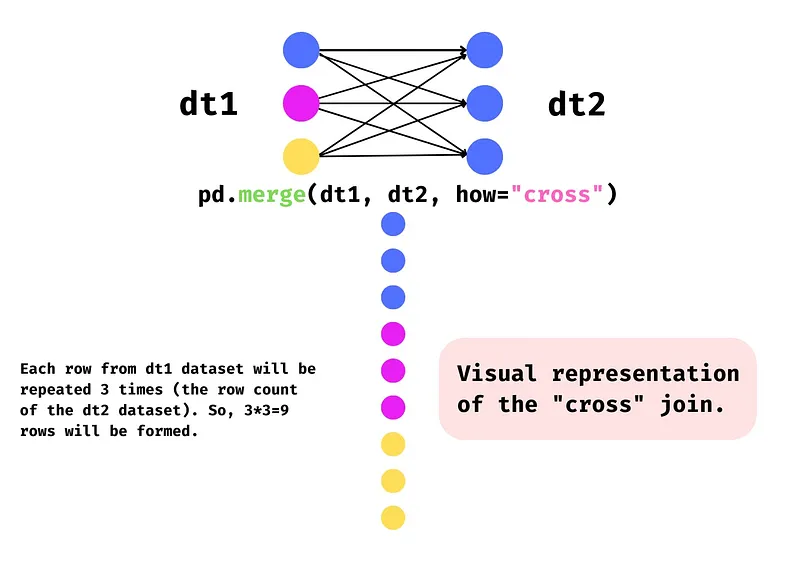

__Representación visual de la fusión cruzada(`cross merge`)__

In [26]:
cross_merging = pd.merge(dt1, dt2, how= "cross" )
cross_merging

,Id_x,Project_id_initial,Name,Role,Experience,Qualification,Id_y,Project_id_final,Age,Salary,No_of_awards
0,A1,Dx13,Sachin,Python Developer,3,Graduate,A1,Dx13,23,36000,0
1,A1,Dx13,Sachin,Python Developer,3,Graduate,A2,Dx11,23,40000,1
2,A1,Dx13,Sachin,Python Developer,3,Graduate,A3,Dx30,27,40000,3
3,A1,Dx13,Sachin,Python Developer,3,Graduate,A6,Dx29,30,35000,4
4,A2,Dx11,Siya,Python Developer,3,Graduate,A1,Dx13,23,36000,0
5,A2,Dx11,Siya,Python Developer,3,Graduate,A2,Dx11,23,40000,1
6,A2,Dx11,Siya,Python Developer,3,Graduate,A3,Dx30,27,40000,3
7,A2,Dx11,Siya,Python Developer,3,Graduate,A6,Dx29,30,35000,4
8,A3,Dx29,Abhishek,PHP Developer,2,Graduate,A1,Dx13,23,36000,0
9,A3,Dx29,Abhishek,PHP Developer,2,Graduate,A2,Dx11,23,40000,1


__Datos fusionados de forma cruzada__

#### Los `on`, `left_on​` & `right_on​` parametros 

El `on` parámetro acepta el nombre de una columna o índice (fila) al que se realizará la unión. Puede ser un solo nombre o una lista de nombres.

El parámetro `left_on` and `right_on` toma el nombre de una columna o índice (fila) del conjunto de datos izquierdo y derecho para realizar la unión. Se utilizan cuando ambos conjuntos de datos tienen diferentes nombres de columna para realizar la unión.

#### Fusionar conjuntos de datos en la misma columna

Para fusionar los conjuntos de datos basados ​​en la misma columna, podemos usar el `on` parámetro y pasar el nombre de columna común que deben tener ambos conjuntos de datos.

In [27]:
merging_on_same_column = pd.merge(dt1, dt2, on='Id')
merging_on_same_column

,Id,Project_id_initial,Name,Role,Experience,Qualification,Project_id_final,Age,Salary,No_of_awards
0,A1,Dx13,Sachin,Python Developer,3,Graduate,Dx13,23,36000,0
1,A2,Dx11,Siya,Python Developer,3,Graduate,Dx11,23,40000,1
2,A3,Dx29,Abhishek,PHP Developer,2,Graduate,Dx30,27,40000,3


__Datos fusionados en función de la misma columna__

Estamos fusionando conjuntos de datos `dt1` y `dt2` nos basamos en la `'Id'` columna que ambos comparten.

Se fusionaron las coincidencias por `Id` de los valores de columna coincidentes de ambos conjuntos de datos y se eliminaron los valores no coincidentes.

#### Fusionar conjuntos de datos en diferentes columnas

Para fusionar diferentes columnas en los conjuntos de datos izquierdo y derecho, utilice los parámetros `left_on` y `right_on`.

La columna de unión es la `"Project_id_initial"` columna del conjunto de datos izquierdo (`dt1`) y la `"Project_id_final"` columna del conjunto de datos derecho ( `dt2`). Los valores compartidos por ambas columnas se utilizarán para fusionarlas.

In [28]:
left_right_merging = pd.merge(dt1, dt2, left_on="Project_id_initial", right_on='Project_id_final')
left_right_merging

,Id_x,Project_id_initial,Name,Role,Experience,Qualification,Id_y,Project_id_final,Age,Salary,No_of_awards
0,A1,Dx13,Sachin,Python Developer,3,Graduate,A1,Dx13,23,36000,0
1,A2,Dx11,Siya,Python Developer,3,Graduate,A2,Dx11,23,40000,1
2,A3,Dx29,Abhishek,PHP Developer,2,Graduate,A6,Dx29,30,35000,4
3,A4,Dx30,Rishu,C++ Developer,4,Post-Graduate,A3,Dx30,27,40000,3


__Datos fusionados según las diferentes columnas__

Como podemos ver, el conjunto de datos incluye ambas columnas, así como filas coincidentes según los valores comunes en las columnas `"Project_id_initial"` y `"Project_id_final"`.

#### Cambiar el sufijo de la columna

Si observa que el conjunto de datos fusionado tiene dos `Id` columnas etiquetadas `Id_x` como y `Id_y`, esto se debe al `suffixes` parámetro , que tiene valores predeterminados `_x` y `_y`, y cuando se encuentran nombres de columnas superpuestos en los conjuntos de datos izquierdo y derecho, se les agrega el sufijo de valores predeterminados.

In [29]:
chg_suffix = pd.merge(dt1, dt2, left_on="Project_id_initial", right_on="Project_id_final", suffixes=["_1", "_2"])
chg_suffix

,Id_1,Project_id_initial,Name,Role,Experience,Qualification,Id_2,Project_id_final,Age,Salary,No_of_awards
0,A1,Dx13,Sachin,Python Developer,3,Graduate,A1,Dx13,23,36000,0
1,A2,Dx11,Siya,Python Developer,3,Graduate,A2,Dx11,23,40000,1
2,A3,Dx29,Abhishek,PHP Developer,2,Graduate,A6,Dx29,30,35000,4
3,A4,Dx30,Rishu,C++ Developer,4,Post-Graduate,A3,Dx30,27,40000,3


__Sufijo cambiado__

#### Unir conjuntos de datos mediante join()

El `join()` método funciona en el `DataFrame` objeto y une las columnas en función de los valores del índice. Realicemos una operación de unión básica en el conjunto de datos.

In [30]:
dt1.join(dt2, lsuffix="_1", rsuffix="_2")

,Id_1,Project_id_initial,Name,Role,Experience,Qualification,Id_2,Project_id_final,Age,Salary,No_of_awards
0,A1,Dx13,Sachin,Python Developer,3,Graduate,A1,Dx13,23,36000,0
1,A2,Dx11,Siya,Python Developer,3,Graduate,A2,Dx11,23,40000,1
2,A3,Dx29,Abhishek,PHP Developer,2,Graduate,A3,Dx30,27,40000,3
3,A4,Dx30,Rishu,C++ Developer,4,Post-Graduate,A6,Dx29,30,35000,4


__Datos unidos a la izquierda__

Las columnas del conjunto de `dt2` datos se unirán con el `dt1` conjunto de datos en función de los valores del índice.

`0` Dado que los valores de índice de ambos conjuntos de datos son los mismos , es decir `1`, `2`, y `3`, es por eso que obtuvimos todas las filas.

Los `join()` parámetros del método se pueden utilizar para manipular el conjunto de datos. El `join()` método, al igual que la `merge()` función, incluye `how` parámetros `on`.

- `how`: El valor predeterminado es `left` join. Es el mismo que el `how` parámetro de la `merge()` función, pero la diferencia es que realiza uniones basadas en índices.
- `on`:Se requiere un nombre de columna o índice para unirse al índice en el conjunto de datos especificado.
- `lsuffix` y `rsuffix`: se utiliza para agregar el sufijo a las columnas superpuestas de los conjuntos de datos izquierdo y derecho.

#### Ejemplos

Unión izquierda sobre un índice

In [31]:
dt1.join(dt2.set_index( "Id" ), on= "Id" , how= "left" ) 
#-------------------------O-----------------------------#
dt1.join(dt2.set_index( "Id" ), on= "Id" )

,Id,Project_id_initial,Name,Role,Experience,Qualification,Project_id_final,Age,Salary,No_of_awards
0,A1,Dx13,Sachin,Python Developer,3,Graduate,Dx13,23.0,36000.0,0.0
1,A2,Dx11,Siya,Python Developer,3,Graduate,Dx11,23.0,40000.0,1.0
2,A3,Dx29,Abhishek,PHP Developer,2,Graduate,Dx30,27.0,40000.0,3.0
3,A4,Dx30,Rishu,C++ Developer,4,Post-Graduate,NaN,NaN,NaN,NaN


__Datos unidos a la izquierda en el índice de identificación__

En el código anterior, utilizamos `set_index('Id')` para establecer la `Id` columna del `dt2` conjunto de datos como índice y realizamos una unión izquierda ( `how="left"`) en la `Id` columna ( on="Id") entre `dt1y` `dt2`.

Esto unirá los valores coincidentes en la `Id` columna del conjunto de `dt2` datos con la `Id` columna del conjunto de `dt1` datos. Si falta algún valor, se completará con `NaN`.

Es lo mismo que cuando usamos la `merge()` función, pero esta vez nos unimos según el índice.

#### Unión derecha en un índice

In [32]:
dt1.join(dt2.set_index( "Id" ), on= "Id" , how= "right" )

,Id,Project_id_initial,Name,Role,Experience,Qualification,Project_id_final,Age,Salary,No_of_awards
0.0,A1,Dx13,Sachin,Python Developer,3.0,Graduate,Dx13,23,36000,0
1.0,A2,Dx11,Siya,Python Developer,3.0,Graduate,Dx11,23,40000,1
2.0,A3,Dx29,Abhishek,PHP Developer,2.0,Graduate,Dx30,27,40000,3
NaN,A6,NaN,NaN,NaN,NaN,NaN,Dx29,30,35000,4


__Datos unidos a la derecha en el índice de identificación__

Unimos el `dt1` conjunto de datos con el índice del `dt2` conjunto de datos según la `Id` columna. Obtuvimos `NaN` las primeras cinco columnas porque `A6` no había valores especificados en el `dt1` conjunto de datos.

#### Unión interna en un índice

In [33]:
dt1.join(dt2.set_index("Id"), on="Id", how="inner")

,Id,Project_id_initial,Name,Role,Experience,Qualification,Project_id_final,Age,Salary,No_of_awards
0,A1,Dx13,Sachin,Python Developer,3,Graduate,Dx13,23,36000,0
1,A2,Dx11,Siya,Python Developer,3,Graduate,Dx11,23,40000,1
2,A3,Dx29,Abhishek,PHP Developer,2,Graduate,Dx30,27,40000,3


__Datos unidos internamente en el índice de identificación__

Los conjuntos de datos se unieron en función de los valores de índice coincidentes, es decir, ambos conjuntos de datos `dt1` y `dt2` comparten `A1`, `A2` y `A3`, por lo que se unieron los valores correspondientes a estos índices.

#### Unión externa en un índice

In [34]:
dt1.join(dt2.set_index("Id"), on="Id", how="outer")

,Id,Project_id_initial,Name,Role,Experience,Qualification,Project_id_final,Age,Salary,No_of_awards
0.0,A1,Dx13,Sachin,Python Developer,3.0,Graduate,Dx13,23.0,36000.0,0.0
1.0,A2,Dx11,Siya,Python Developer,3.0,Graduate,Dx11,23.0,40000.0,1.0
2.0,A3,Dx29,Abhishek,PHP Developer,2.0,Graduate,Dx30,27.0,40000.0,3.0
3.0,A4,Dx30,Rishu,C++ Developer,4.0,Post-Graduate,NaN,NaN,NaN,NaN
NaN,A6,NaN,NaN,NaN,NaN,NaN,Dx29,30.0,35000.0,4.0


__Datos unidos externamente en el índice de identificación__

Realizamos la unión externa, que incluyó todas las filas de ambos conjuntos de datos en función de `Id`. Se completaron los valores correspondientes y los valores faltantes se completaron con `NaN`.

#### Unión cruzada

In [35]:
dt1.join(dt2, how="cross", lsuffix="_1", rsuffix="_2")

,Id_1,Project_id_initial,Name,Role,Experience,Qualification,Id_2,Project_id_final,Age,Salary,No_of_awards
0,A1,Dx13,Sachin,Python Developer,3,Graduate,A1,Dx13,23,36000,0
1,A1,Dx13,Sachin,Python Developer,3,Graduate,A2,Dx11,23,40000,1
2,A1,Dx13,Sachin,Python Developer,3,Graduate,A3,Dx30,27,40000,3
3,A1,Dx13,Sachin,Python Developer,3,Graduate,A6,Dx29,30,35000,4
4,A2,Dx11,Siya,Python Developer,3,Graduate,A1,Dx13,23,36000,0
5,A2,Dx11,Siya,Python Developer,3,Graduate,A2,Dx11,23,40000,1
6,A2,Dx11,Siya,Python Developer,3,Graduate,A3,Dx30,27,40000,3
7,A2,Dx11,Siya,Python Developer,3,Graduate,A6,Dx29,30,35000,4
8,A3,Dx29,Abhishek,PHP Developer,2,Graduate,A1,Dx13,23,36000,0
9,A3,Dx29,Abhishek,PHP Developer,2,Graduate,A2,Dx11,23,40000,1


__Conjunto de datos unidos de forma cruzada__

No pasamos el parámetro `on`, sino que definimos cómo se deben unir los datos ( `how="cross"`). El conjunto de datos resultante será el producto de los recuentos de filas de ambos conjuntos de datos.

#### Conclusión

Aprendimos a utilizar `pandas.concat()`, `pandas.merge()` y `pandas.DataFrame.join()` para combinar, fusionar y unir DataFrames.

La `concat()` función en `pandas` es una opción ideal para combinar los DataFrames debido a su simplicidad. Sin embargo, si queremos tener más control sobre cómo se unen los datos y en qué columna del DataFrame, la `merge()` función es una buena opción. Si queremos unir datos en función del índice, deberíamos usar el `join()` método.